<a href="https://colab.research.google.com/github/jpshannon59/EDAP/blob/main/IMDB_Top_1000_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Part 1: Select and Prepare the Data**

You should start by picking a topic area of interest to you and finding a dataset that can provide insights into that topic. We have provided some datasets below that you can start from. But we encourage you to investigate a different topic and dataset. If you self-select a dataset and are concerned about its appropriateness for the assignment, you can check with the TAs regarding the same.

**Note:** The data collection and preparation (also known as data wrangling) can be a very tedious and time-consuming process. Be sure you have sufficient time to conduct exploratory analysis, after preparing the data.

After selecting a topic and dataset – but prior to analysis – you should write down an initial set of at least three questions you’d like to investigate.

## **Part 2: Exploratory Analysis**

Once you have picked the dataset and performed the initial data wrangling, you will perform exploratory analysis to investigate your data. For this assignment we would like you to use Pandas, NumPy and matplotlib to help you with the analysis. 

**Phase 1:** You should start the exploration by first examining the shape and structure of your data. What dimensions/variables does it contain and how are the data values distributed? Are there any notable data quality issues? Find out if there are missing values in the data and think of how you can handle them. Are there any surprising relationships between the dimensions/variables? Make sure to perform sanity checks for patterns you expect to see! Note that it may be the case that after doing a bit of exploration in phase 1 you find that your data is not as interesting as you first thought. In such cases you might consider returning to Part 1 and identifying a different dataset to work with. Such iteration on choosing the dataset is common, but also time-consuming, so make sure you leave time in your schedule for this.

**Phase 2:** Next, you should investigate your initial questions, as well as any new questions that arise during your exploration. For each question, create a visualization that might provide a useful answer. Then refine the visualization (by adding additional variables, changing the sort ordering or axis scales, filtering or subsetting data, etc.) to develop better perspectives explore unexpected observations, or sanity check your assumptions. You should repeat this process for each of your questions, and also feel free to revise your questions or branch off to explore new questions as the data warrants.

Importing IMDb Top 1000 Movies 

In [5]:
import pandas
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
df = pandas.read_csv("sample_data/imdb_top_1000.csv")
df.set_index("Series_Title", drop=False)
df.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [6]:
print("number of rows", len(df))
df.columns

number of rows 1000


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

Finding missing values 

In [7]:
print("Number of missing values for each column.")
df.isnull().sum()


Number of missing values for each column.


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Descriptive statistics for each column

In [8]:
for col in df.columns:
  print("Descriptive statistics for", col)
  print(df[col].describe())
  print("\n\n")

Descriptive statistics for Poster_Link
count                                                  1000
unique                                                 1000
top       https://m.media-amazon.com/images/M/MV5BMTQ0Nj...
freq                                                      1
Name: Poster_Link, dtype: object



Descriptive statistics for Series_Title
count         1000
unique         999
top       Drishyam
freq             2
Name: Series_Title, dtype: object



Descriptive statistics for Released_Year
count     1000
unique     100
top       2014
freq        32
Name: Released_Year, dtype: object



Descriptive statistics for Certificate
count     899
unique     16
top         U
freq      234
Name: Certificate, dtype: object



Descriptive statistics for Runtime
count        1000
unique        140
top       130 min
freq           23
Name: Runtime, dtype: object



Descriptive statistics for Genre
count      1000
unique      202
top       Drama
freq         85
Name: Genre, dtype: object

Distribution of Meta Scores throughout top thousand movies

<Figure size 720x360 with 0 Axes>

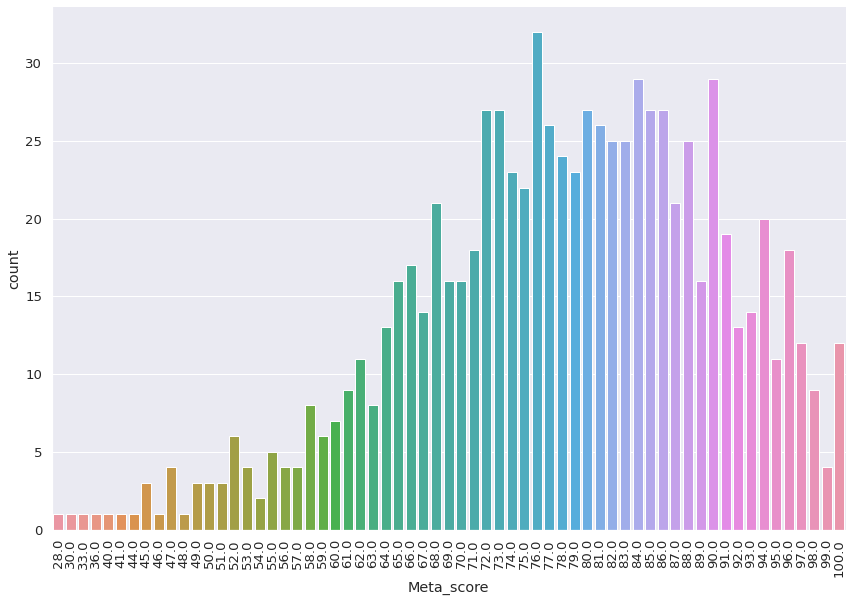

In [34]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1.2)

chart = sns.catplot( x='Meta_score',
             kind="count", 
             height=8, 
             aspect=1.5, 
             data=df)
chart.set_xticklabels(rotation=90)


Number of movies released each year

<Figure size 720x360 with 0 Axes>

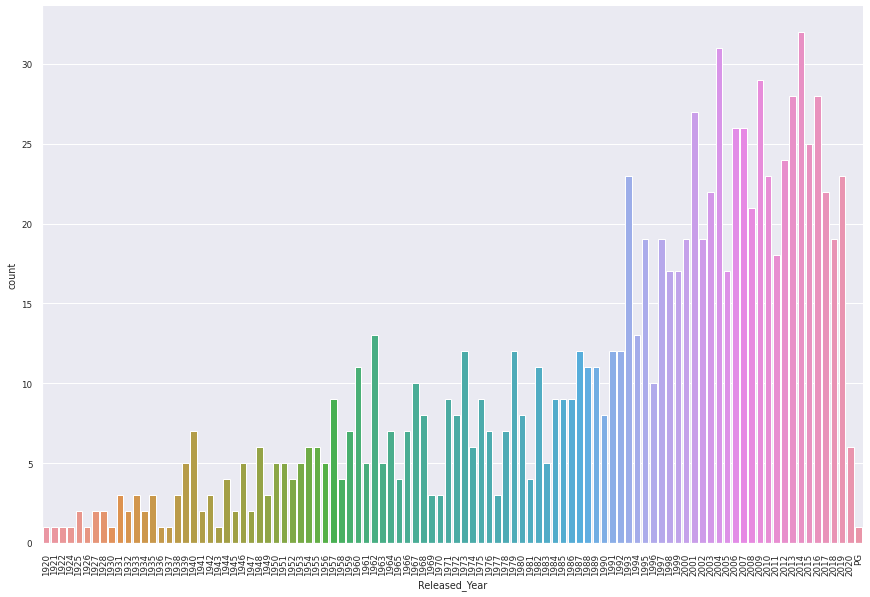

In [29]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 0.8)

chart = sns.catplot( x='Released_Year',
             kind="count", 
             height=8, 
             aspect=1.5, 
             data=df, order=sorted(set(df['Released_Year'])))
chart.set_xticklabels(rotation=90)

Average Meta Score of movies on the list grouped by year 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

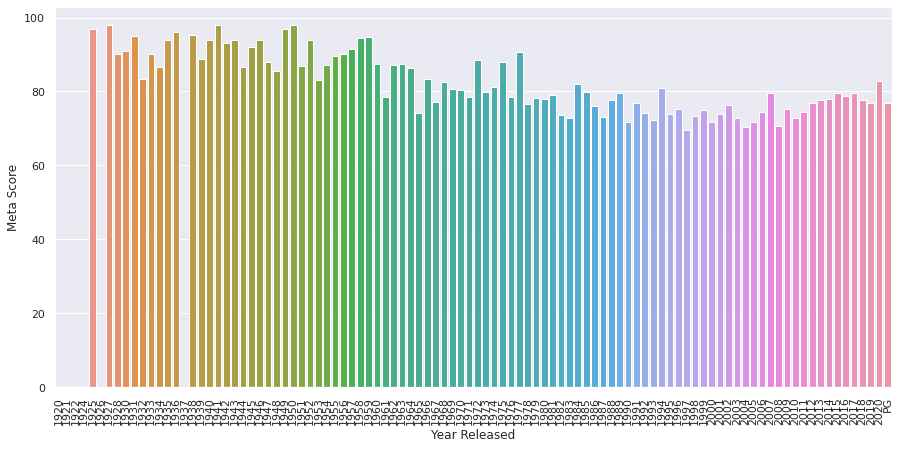

In [31]:
mean_scores = df.groupby("Released_Year")['Meta_score'].agg("mean")
plt.figure(figsize=(15,7))
# ax = sns.barplot(x = "Released_Year", y = "Meta_score", data = df)
# ax.set(xlabel="Released Year", ylabel = "Meta Score")
sns.set(font_scale = 1)
chart = sns.barplot(mean_scores.index, mean_scores.values)
chart.set(xlabel="Year Released", ylabel = "Meta Score")
plt.xticks(rotation=90)

Average IMDb Score of movies on the list grouped by year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

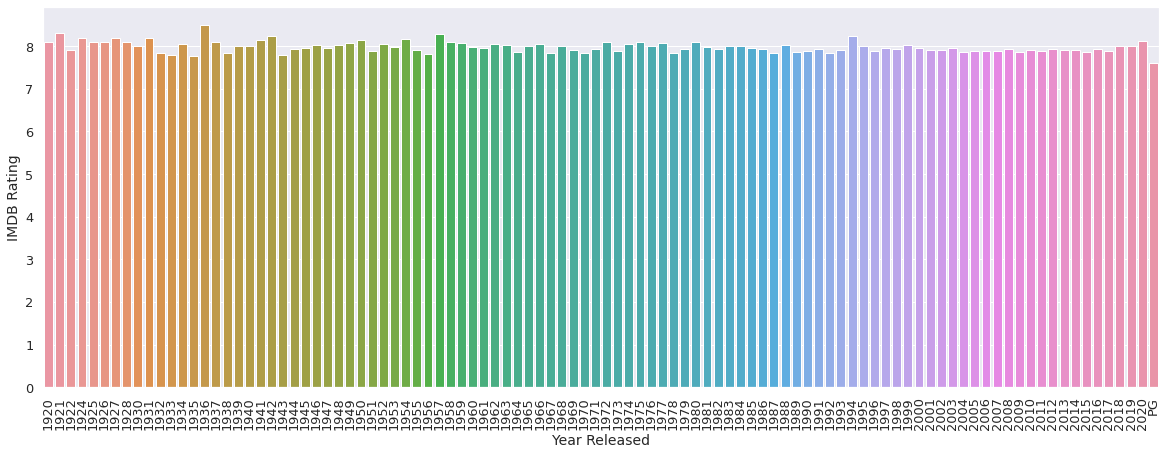

In [32]:
mean_rating = df.groupby("Released_Year")['IMDB_Rating'].agg("mean")
plt.figure(figsize=(20,7))
sns.set(font_scale = 1.17)
chart = sns.barplot(mean_rating.index, mean_rating.values)
chart.set(xlabel="Year Released", ylabel = "IMDB Rating")
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

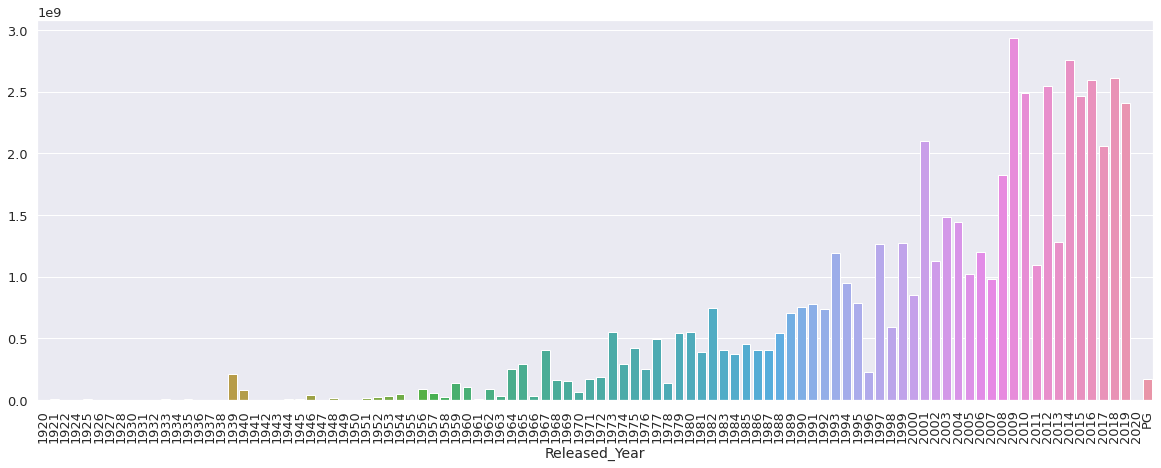

In [ ]:
df["Gross_int"] = df["Gross"].str.replace(",", "").astype(float)
total_gross = df.groupby("Released_Year")['Gross_int'].agg("sum")
plt.figure(figsize=(20,7))
sns.set(font_scale = 1.17)
chart = sns.barplot(total_gross.index, total_gross.values)
plt.xticks(rotation=90)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

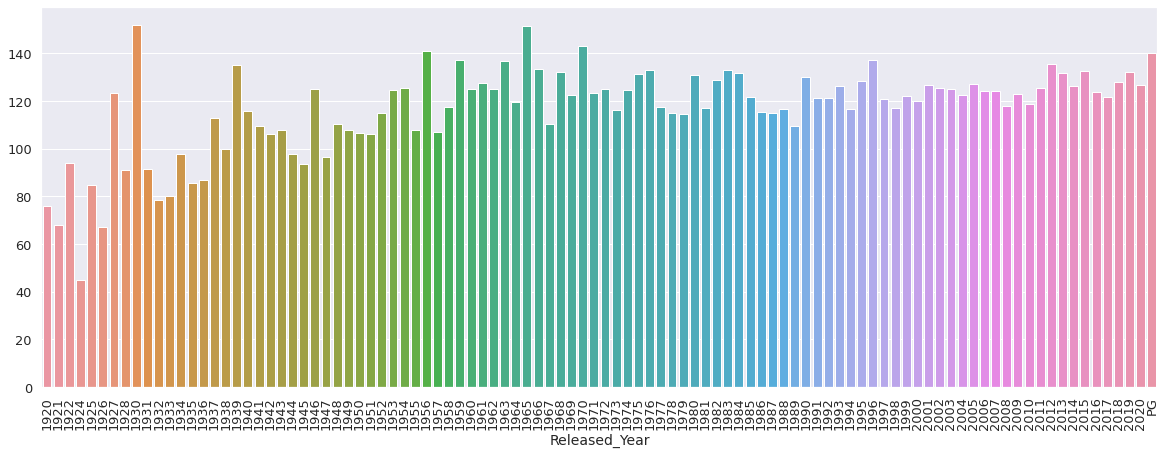

In [ ]:
df["Runtime_minutes"] = df["Runtime"].str.replace("min", "").astype(int)
avg_length = df.groupby("Released_Year")['Runtime_minutes'].agg("mean")
plt.figure(figsize=(20,7))
sns.set(font_scale = 1.17)
chart = sns.barplot(avg_length.index, avg_length.values)
plt.xticks(rotation=90)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


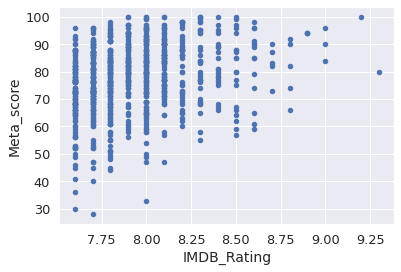

In [ ]:
df.plot.scatter(x = "IMDB_Rating", y = "Meta_score")


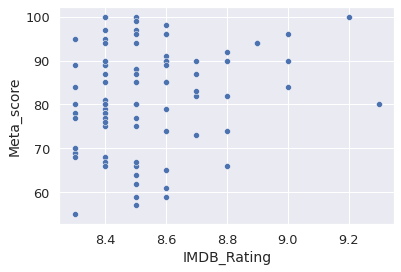

In [33]:
sns.scatterplot(data=df.iloc[0:100], x="IMDB_Rating", y="Meta_score", "hue = "Gross_int)

In [ ]:
df["Popular Versus Expert"] = (df["IMDB_Rating"] * 10) - df["Meta_score"] 
# df.nlargest(10, "Popular Versus Expert")
df[ ["Series_Title", "Popular Versus Expert", "Gross", "Released_Year"] ].nlargest(20, "Popular Versus Expert")

,Series_Title,Popular Versus Expert,Gross,Released_Year
788,I Am Sam,49.0,"40,311,852",2001
356,Tropa de Elite,47.0,"8,060",2007
942,The Butterfly Effect,46.0,"57,938,693",2004
917,Seven Pounds,40.0,"69,951,824",2008
735,Kai po che!,37.0,"1,122,527",2013
957,Fear and Loathing in Las Vegas,35.0,"10,680,275",1998
272,Pink Floyd: The Wall,34.0,"22,244,207",1982
648,The Boondock Saints,34.0,"25,812",1999
397,Bound by Honor,33.0,"4,496,583",1993
677,Predator,33.0,"59,735,548",1987


In [ ]:
df[ ["Series_Title", "Popular Versus Expert", "Gross", "Released_Year"] ].nsmallest(20, "Popular Versus Expert")

,Series_Title,Popular Versus Expert,Gross,Released_Year
491,Boyhood,-21.0,"25,379,975",2014
559,Notorious,-21.0,"10,464,000",1946
423,Il conformista,-20.0,"541,940",1970
440,Sweet Smell of Success,-20.0,NaN,1957
714,The Lady Vanishes,-20.0,NaN,1938
994,A Hard Day's Night,-20.0,"13,780,024",1964
260,Trois couleurs: Rouge,-19.0,"4,043,686",1994
274,Fanny och Alexander,-19.0,"4,971,340",1982
438,Touch of Evil,-19.0,"2,237,659",1958
442,The Night of the Hunter,-19.0,"654,000",1955


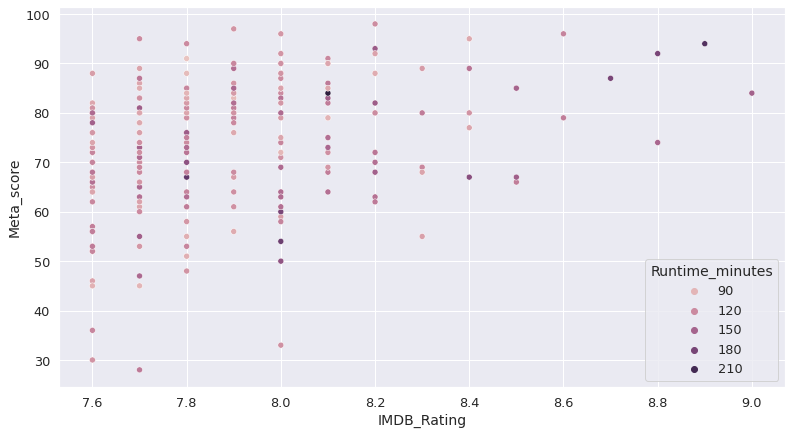

In [ ]:
#Fixing the row with ReleasedYear == PG
df["Released_Year"] = pandas.to_numeric(df["Released_Year"], errors = "coerce") #any invalid value will turn to NaN
plt.figure(figsize=(13,7))
df2000_2010 = df[(df["Released_Year"]>= 2000) & (df["Released_Year"]<= 2010) ]
sns.scatterplot(data=df2000_2010, x="IMDB_Rating", y="Meta_score", hue="Runtime_minutes")


In [ ]:
df.columns
print(df.Gross_int)

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
995            NaN
996            NaN
997     30500000.0
998            NaN
999            NaN
Name: Gross_int, Length: 1000, dtype: float64



## **Final Deliverable**

Your final submission should consist of captioned visualizations detailing your most important insights. You will also work on writing and posting a blog to medium or your github website. Your “insights” can include important surprises or issues (such as data quality problems affecting your analysis) as well as responses to your analysis questions.

Each visualization image should be a screenshot accompanied with a title and descriptive caption (1-4 sentences long) describing the insight(s) learned from that view. Provide sufficient detail for each caption such that anyone could read through your report and understand what you’ve learned. You are free, but not required, to annotate your images to draw attention to specific features of the data. 

Do not submit a blog cluttered with everything little thing you tried. Submit a clean report that highlights the most important “milestones” in your exploration, which can include initial overviews, identification of data quality problems, confirmations of key assumptions, and potential “discoveries”. Your blog should only present the final dataset you analyzed and should not describe any iterations on earlier datasets you might have initially explored.

## **Data Sources**

There are a variety of data sources available online. Here are some possible sources to consider. If you have any questions about whether your dataset is appropriate, please talk to the TAs.

**Data is Plural** - Variety of datasets and sources covering many topics.

https://data.gov - U.S. Government open datasets.

U.S. Census Bureau - Census data - https://data.census.gov/

Federal Elections Commission - Campaign finance and expenditures. - https://www.fec.gov/data/

Federal Aviation Administration - FAA data - https://www.faa.gov/data_research/

https://www.kaggle.com/

https://archive.ics.uci.edu/ml/index.php

https://github.com/awesomedata/awesome-public-datasets - Awesome Public Datasets - Variety of public datasets.

Stanford Cable TV News Analyzer - We have recently released a tool that can be used to analyze who and what appears in the last decade of Cable TV News (i.e. CNN, Fox News, MSNBC). The site lets you download data as well which you could use to conduct further analysis. - https://tvnews.stanford.edu/data

### **Visualization Tool (matplotlib, seaborn, etc)**

One goal of this assignment is for you to learn to use and evaluate the effectiveness of these packages. In addition to these packages, you are free to also use other visualization tools as you see fit, for example, you could also take a look at Tableau.

### **Data Wrangling Tools**

The data you choose may require reformatting, transformation or cleaning prior to visualization. You can use Pandas for data preparation. 

### **Grading**

Each submission will be graded based on both the analysis process and the included visualizations. Here are our grading criteria:

**Appropriate Data Assessment (5):** Overview/understanding of the data is built from transformations and appropriate assessment of data quality. Poses clear questions.

**Exploration Thoroughness (5):** Sufficient breadth of analysis, exploring questions in sufficient depth (with appropriate follow-up questions).

**Documentation (Blog) (5):** Clear documentation of exploratory process, including clearly written, understandable captions that communicate primary insights.

**Appropriate use of Numpy, Pandas, and Matplotlib (5)**  to ingest, clean, and present the data

### **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Sunday (03/07/2021)

To submit your assignment, download your notebook and zip all the necessary files(data files). Submit the zipped file to balckboard. Make sure the notebook and the zipped file is named in the format - EDA_LastName_FirstName. Be sure to include the link to access your blog in your notebook.

Also include the link to your notebook in the submission. 

We will provide more details on the blog during the next week of class.

**Note** - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.